#Pytorch Toy Project

---

by imjjun(KUBIG 16th)

We would learn about:

- Tensor

- Autograd

- Loss

- Optimizer

- & Overview of Training with Pytorch !

In [1]:
import torch

##1. Tensor

Tensor is the array which is more than 3 dimensions 'originally' But in Pytorch, we use this term on the whole array.

Therefore, np.array([1]) is also a tensor in pytorch ! You have to figure out this notion in advance.

The rests are very Similiar with Numpy :) Just see what difference it has

In [2]:
#Tensor

tensor1=torch.tensor([[[[1.,2.],[3.,4.],[5.,6.],[7.,8.]]]])
tensor2=torch.tensor([[[[9.,10.],[11.,12.],[13.,14.],[15.,16.]]]])


In [3]:
tensor1.shape

torch.Size([1, 1, 4, 2])

In [4]:
#Add

print(tensor1+tensor2)
print(torch.add(tensor1,tensor2).shape)

tensor([[[[10., 12.],
          [14., 16.],
          [18., 20.],
          [22., 24.]]]])
torch.Size([1, 1, 4, 2])


In [5]:
#Subtract

print(tensor1-tensor2)
print(torch.sub(tensor1, tensor2))

tensor([[[[-8., -8.],
          [-8., -8.],
          [-8., -8.],
          [-8., -8.]]]])
tensor([[[[-8., -8.],
          [-8., -8.],
          [-8., -8.],
          [-8., -8.]]]])


In [6]:
#Multiplication -> element-wise

print(tensor1 * tensor2)
print(torch.mul(tensor1,tensor2))

tensor([[[[  9.,  20.],
          [ 33.,  48.],
          [ 65.,  84.],
          [105., 128.]]]])
tensor([[[[  9.,  20.],
          [ 33.,  48.],
          [ 65.,  84.],
          [105., 128.]]]])


In [7]:
#division

print(tensor2/tensor1)
print(torch.div(tensor2, tensor1))

tensor([[[[9.0000, 5.0000],
          [3.6667, 3.0000],
          [2.6000, 2.3333],
          [2.1429, 2.0000]]]])
tensor([[[[9.0000, 5.0000],
          [3.6667, 3.0000],
          [2.6000, 2.3333],
          [2.1429, 2.0000]]]])


In [8]:
#Matrix Multiplication (mul + dot)
tensor1 = torch.randn(10, 3, 4)  ## 인자는 size ...
tensor2 = torch.randn(10, 4, 5)
print(torch.matmul(tensor1, tensor2).size())

torch.Size([10, 3, 5])


In [9]:
test1 = torch.randn(10)
test1.shape

torch.Size([10])

In [10]:
import numpy as np

a = np.ones((2,4))
b = 2 * a
c = 3 * a
d = np.stack((a,b,c), axis=2)
print(f"d matrix : \n{d}")

d_t = torch.from_numpy(d).double()
print(f"size of d : {d_t.shape}")

e = torch.tensor([1,10,100]).double()
print(f"size of e : {e.shape}")

result = torch.matmul(d_t,e)
print(f"**result : \n{result}")
print(f"**size of result : {result.shape}")

d matrix : 
[[[1. 2. 3.]
  [1. 2. 3.]
  [1. 2. 3.]
  [1. 2. 3.]]

 [[1. 2. 3.]
  [1. 2. 3.]
  [1. 2. 3.]
  [1. 2. 3.]]]
size of d : torch.Size([2, 4, 3])
size of e : torch.Size([3])
**result : 
tensor([[321., 321., 321., 321.],
        [321., 321., 321., 321.]], dtype=torch.float64)
**size of result : torch.Size([2, 4])


##2. Autograd

Backpropagation is 'very' important in DL since it makes the model be closer to the desirable model which we have wished. The detailed content would be covered in session.

역전파라는 개념은 굉장히 중요합니다. 모든 모델은 '학습' 과정을 거쳐야하기에 어떠한 방법으로, 어떠한 초매개변수(hyperparameter)를 활용하여 학습할지 결정하고 이 값을 모델의 가중치에 반영해주는 것이 역전파입니다.

1. What is CUDA?

- Since you know that we use 'GPU' for accelerating the operations of tensors, we have to load the operation to GPU. And CUDA is a Good Tool for GPGPU.

2. Autograd?

- Thankfully, torch fundamentally contains the gradient operation methods so we don't need to implement it one by one. We call this convenient function 'Autograd'_자동미분

- In pytorch, there is a variable, 'require_grad' and it can determine the necessity of gradient when training!

3. Batch Size?

- Of course, mentioned in course, we could not handle whole of dataset at once, considering the size of dataset(very huge)

- So, ideally, calculating whole things at once seems wonderful but we can't. Instead, we separate dataset into 'batch' or 'mini batch'.

- Multiplier of 2 is usually used for batch sizing i.e) 2,4,16, 32, 64 ,...

In [11]:
#Check that cuda is operating appropriately

if torch.cuda.is_available():
  device=torch.device('cuda') #relatively fast
else:
  device=torch.device('cpu') #only cpu for training & evaluating #Very slow
print(device)

cuda


In [12]:
batch_size=32

In [13]:
#We can use this variable as below :)
x=torch.randn(4 , requires_grad=True)
y=torch.randn(4, requires_grad=False)

print(x)
print(y)

tensor([-0.3116, -0.1887, -0.5264, -0.4159], requires_grad=True)
tensor([ 0.5113, -1.0507, -1.2095,  1.0684])


##3 Loss


For many tasks on Deep Learning, there are some several loss functions to cover:

1. Classification

- Cross Entropy Loss: loss between input logits and target

  it is used for classification about Multiple Classes



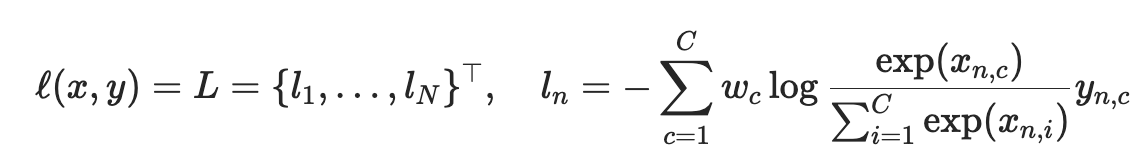

 - Binary Cross Entropy Loss:
   
   Used to Binary Classification(ex. dog or not)

 - (Soft) Margin Loss:

  which is similar to SVM Loss


-  etc,,,


2. Regression

- MSE loss: squared L2


- (Smooth) L1 loss: MAE

- etc,,,



In [14]:
import torch.nn as nn

#Classification Loss

loss=nn.CrossEntropyLoss()
loss=nn.BCELoss()
loss=nn.MultiMarginLoss()

#Regression Loss
loss=nn.MSELoss()
loss=nn.L1Loss()
loss=nn.SmoothL1Loss()

#4 Optimizer


In most cases, we use Adam due to its performace but there are still many optimizers that we could use :)


- SGD

- Adagrad

- RMSprop

- Adadelta

- & Adam !

In [15]:
# important variable is just written on each:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer =torch.optim.Adagrad(model.parameters(), lr=0.1, weight_decay=0.01)
optimizer =torch.optim.RMSprop(model.parameters(), lr=0.1, alpha=0.9)
optimizer =torch.optim.Adadelta(model.parameters(), lr=0.01, rho=0.95)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.953))

## zero_grad() : 새로운 미니 배치 학습을 진행할 때 누적된 기울기를 0으로 초기화시켜주기 위해 사용

optimizer.zero_grad() #Since optimizer cumulates the gradient, we have to make it clear by .zero_grad()
loss(model(input), target).backward() #backward() means backpropagation, and in torch, we can implement backpropagation by only one-line code: loss.backward()  <-Kiya~~
optimizer.step() #Then, optimizer updates the gradient on weights

NameError: ignored

#5 Just training Very simple model !

This code is based on tutorials of pytorch official site.

Just see the whole process(details would be handled later) and make your own code to make better model !

In [18]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


#FashionMNIST is a quite famous dataset: Fashion Image Dataset

#Train data download
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

#Test data download
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

#Make dataloader for iteration when training
#would be covered on next toy project

## dataloader : 데이터를 mini-batch로 나누고, 데이터를 더 효율적으로 로드하고 셔플하는 등의 역할을 수행하는 유틸리티
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


## Note : torch.nn.module
##  ~ 신경망 모델을 구성하는 데에 사용되는 기본적인 클래스
##  ~ torch.nn.Module을 상속받은 클래스는 파이토치 신경망 모델로서 사용 가능
##  ~ 모델에 model.parameters() 메서드를 활용하여 클래스 내부에 정의된 레이어 가중치를 쉽게 관리 가능

class SoftmaxClassifier(nn.Module):
    # def __init__(self):
    #     super().__init__()  # Note : 부모 클래스인 nn.Module 클래스의 __init__ 메서드가 수행되어 초기화 작업 진행
    #     self.flatten = nn.Flatten()  # 다차원 텐서를 1차원으로 평탄화 시켜줌
    #     self.linear=nn.Linear(28*28, 10)  # input, output의 크기를 인자로 받으며 완전 연결 레이어 구현에 사용됨 + 무작위로 초기화된 가중치와 편향 가짐
    #     self.softmax=nn.Softmax()

    def __init__(self):
      super().__init__()
      self.flatten = nn.Flatten()
      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28, 512),
          nn.ReLU(),
          # nn.Linear(512, 512),
          # nn.ReLU(),
          nn.Linear(512, 10),
          nn.Softmax()
      )

    def forward(self, x):
        x = self.flatten(x)
        # x = self.linear(x)
        # x = self.softmax(x)
        x = self.linear_relu_stack(x)
        return x

model = SoftmaxClassifier()

In [19]:
#You can control the Step Size & batch size & Epochs: How many times do you want to train the model?

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [20]:
#Define your loss function
loss = nn.CrossEntropyLoss()

In [21]:
#Define your optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer_RMSProp = torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.953))

Training Code

Just see the process! It contains the basic process of DL :)

In [22]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # dataloader 객체가 사용하는 데이터셋(dataset)을 참조하는 속성 ~ 데이터를 로드할 때 사용하는 데이터셋 객체를 가리킴
    model.train() # Training mode ~ Note : 위에 정의한 model 에는 train 메서드가 없는데... ~ nn.Module 클래스에 포함된 메서드
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X) #forward
        loss = loss_fn(pred, y) #compute the loss

        # Backpropagation
        optimizer.zero_grad() #zero grad first! Always !
        loss.backward() #backprop ~ 가중치 gradient 계산
        optimizer.step() #Update your weights ~ 가중치 update


        # 디버깅용 코드인것 같다.
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

Test process

This process will tell the model's performance on the point of view of 'generalization'

In [23]:
def test_loop(dataloader, model, loss_fn):

    model.eval() #test mode ~ dropout 같은 레이어 비활성화 + 가중치가 고정된 상태로 입력데이터에 대한 예측 수행해야함
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0 #define the variable

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode

    # no_grad() ~ 자동 미분 비활성화, with 문과 함께 사용됨 -> gradient 계산 추적 x (가중치 업데이트 x)
    with torch.no_grad(): # For test mode, testing is just a 'forward' process, not backprop -> 파라미터 업데이트 X
        for X, y in dataloader:
            # pred의 shape : (Batch Size, class 수)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()  # 손실 값을 스칼라 값으로 변환하여 얻음
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches #mean
    correct /= size #mean
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#Toy Project

여러분들이 사용하시고 싶은 Optimizer, Loss function을 적극 활용하셔서 Accuracy를 높여보시길 바랍니다!

비단 optimizer, loss뿐 아니라, epoch, batch size, 심지어는 model 내부에 들어가는 nn.Linear 차원 변경이나 다른 hidden layer를 쌓아보셔도 됩니다.

차원에 대한 고민, 그리고 torch 코드에 대한 고민을 쭉 해보시면서 이번 project에 접근해보시면 좋을 것 같습니다.

아마 numpy로 구현하신 loss 값과 accuracy가 비슷하게 나올겁니다,,

런타임 유형을 GPU로 놓고 돌리셔야 빨리 되십니다 ! 상기된 cuda.is_available()도 확인해주세요

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Done!")

Epoch 1
-------------------------------
loss: 2.299487  [   64/60000]
loss: 2.195523  [ 6464/60000]
loss: 2.179899  [12864/60000]
loss: 2.211150  [19264/60000]
loss: 2.148646  [25664/60000]
loss: 2.242235  [32064/60000]
loss: 2.101776  [38464/60000]
loss: 2.177819  [44864/60000]
loss: 2.226653  [51264/60000]
loss: 2.101472  [57664/60000]
Test Error: 
 Accuracy: 33.2%, Avg loss: 2.128961 

Epoch 2
-------------------------------
loss: 2.117400  [   64/60000]
loss: 2.070554  [ 6464/60000]
loss: 2.101616  [12864/60000]
loss: 2.163984  [19264/60000]
loss: 2.023143  [25664/60000]
loss: 2.160654  [32064/60000]
loss: 2.039237  [38464/60000]
loss: 2.117217  [44864/60000]
loss: 2.101352  [51264/60000]
loss: 2.054704  [57664/60000]
Test Error: 
 Accuracy: 36.2%, Avg loss: 2.098458 

Epoch 3
-------------------------------
loss: 2.054901  [   64/60000]
loss: 2.039276  [ 6464/60000]
loss: 2.070526  [12864/60000]
loss: 2.148915  [19264/60000]
loss: 2.039276  [25664/60000]
loss: 2.148269  [32064/600